In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 7.1 og 7.2 Kardinalpolynomier

In [8]:
def newtonInterpolation(x, y, t, n): # page 165 in the book
    """Newton interpolation polynomial. From page 165 in the book
    x, y: data points
    t: interpolation points
    n: number of data points
    """
    # divided difference table
    d = np.zeros((n, n))
    d[:, 0] = y
    for j in range(1, n):
        for i in range(n-j):
            d[i, j] = (d[i+1, j-1] - d[i, j-1]) / (x[i+j] - x[i])
    # evaluate polynomial
    p = d[0, 0]
    for j in range(1, n):
        pt = d[0, j]
        for k in range(j):
            pt = pt * (t - x[k])
        p = p + pt
    # coeficients
    c = d[0, :n]
    return p, c


In [9]:
newtonInterpolation([3,5,7],[1,0,1],4,3)

(0.25, array([ 1.  , -0.5 ,  0.25]))

In [ ]:
newtonInterpolation([0,1,2,3,3,5])

In [10]:
# Lagrange cardinal CardinalPolynomial
def CardinalPolynomial(x, i, t):
    """Lagrange cardinal polynomial
    x: list of nodes(knots)
    i: index of the node
    t: points to evaluate the polynomial as list
    """
    l = lambda k: np.prod([(k - x[j]) / (x[i] - x[j]) for j in range(len(x)) if j != i])
    return np.array([l(k) for k in t])

In [37]:
a = CardinalPolynomial([1, 2, 3], 0, [1,2,3,4,4,4])
np.stack((a,CardinalPolynomial([1, 2, 3], 1, [2.5,1.2,4.2,3,5,5]))).T

array([[ 1.  ,  0.75],
       [-0.  ,  0.36],
       [ 0.  , -3.84],
       [ 1.  , -0.  ],
       [ 1.  , -8.  ],
       [ 1.  , -8.  ]])

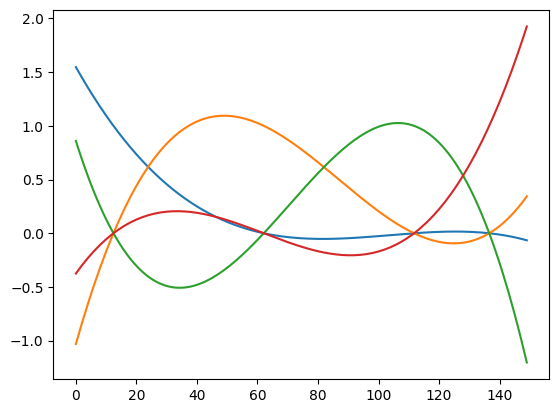

In [21]:
plt.plot(CardinalPolynomial([-1,1,3,4],0,np.linspace(-1.5, 4.5, 150)))
plt.plot(CardinalPolynomial([-1,1,3,4],1,np.linspace(-1.5, 4.5, 150)))
plt.plot(CardinalPolynomial([-1,1,3,4],2,np.linspace(-1.5, 4.5, 150)))
plt.plot(CardinalPolynomial([-1,1,3,4],3,np.linspace(-1.5, 4.5, 150)))
plt.show()

In [70]:
def InterpolerLagrangeForm(x, y, t):
    """ Calculates the values of the interpolating polynomial in Lagrange form
    args:
        x: list of nodes(knots)
        y: list of y-values
        t: points to evaluate the polynomial as list
        
    Returns:
        list: [P(t1) ... P(tm)]  a row with the m function values of the interpolating polynomial
    """
    cardinals = CardinalPolynomial(x,0,t)
    for i in range(1,len(x)):
        cardinals = np.vstack((cardinals,CardinalPolynomial(x,i,t)))

    cardinals = cardinals.T
    P_val = np.zeros(len(t))
    for idx in range(len(t)):
        P_val[idx] = np.sum(np.multiply(cardinals[idx],y))
    return P_val


In [72]:
InterpolerLagrangeForm([0,1,3],[2,3,2],[0,1,2,3,4])

array([2., 3., 3., 2., 0.])

## 7.3 Interpolation af tabel

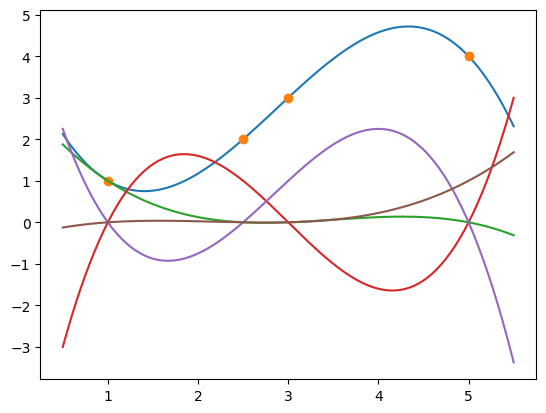

In [76]:
x = [1,2.5,3,5]
y = [1,2,3,4]
t = np.linspace(0.5,5.5,200)

plt.plot(t,InterpolerLagrangeForm(x,y,t))
plt.plot(x,y,'o')
plt.plot(t,CardinalPolynomial(x,0,t))
plt.plot(t,CardinalPolynomial(x,1,t))
plt.plot(t,CardinalPolynomial(x,2,t))
plt.plot(t,CardinalPolynomial(x,3,t))
plt.show()

## 7.4 Approksimation af en eksponentialfunktion

In [81]:
def SecondInterpolationError(n,M,h):
    return 1/(4*(n+1))*M*h**(n+1)

In [82]:
M = np.exp(3)
SecondInterpolationError(12,M,4/12)

2.422723158644242e-07

In [85]:
x = np.linspace(-1,3,13)
t = np.linspace(-1,3,300)
y = np.exp(x)

p12 = InterpolerLagrangeForm(x,y,t)
fx = np.exp(t)

In [95]:
print(np.max(np.abs(fx-p12)))
print(np.argmax(np.abs(fx-p12)))
print(t[292])

1.735997301466341e-08
292
2.9063545150501673


## 7.5 Instabilitet

In [121]:
def errorbuddy(n,plot=False):
    x = np.linspace(-5,5,n+1)
    t = np.linspace(-5,5,300)
    y = 1/(1+x**2)
    p = InterpolerLagrangeForm(x,y,t)
    fx = 1/(1+t**2)
    if plot:
        plt.plot(t,fx)
        plt.plot(t,p)
        plt.show()
    return np.abs(fx-p)

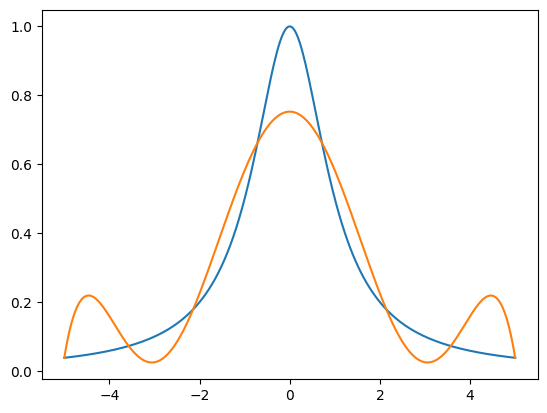

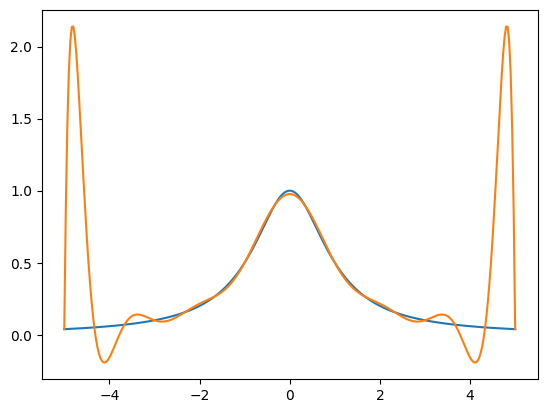

In [122]:
er7 = errorbuddy(7,plot=True)
er15 = errorbuddy(15,plot=True)

In [127]:
errors = []
ns = []
for i in range(31):
    errors.append(errorbuddy(i).max())
    ns.append(i)

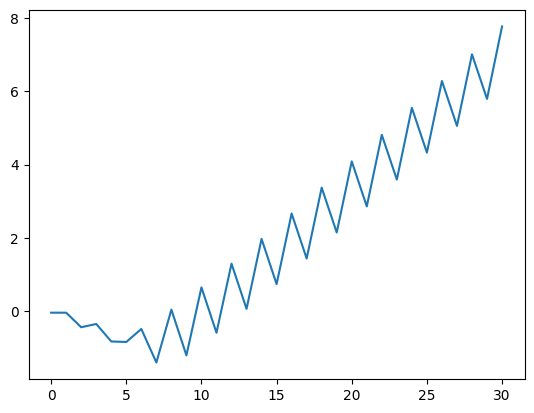

In [130]:
plt.plot(ns,np.log(errors))

In [131]:
def errorbuddyIntervalLess(n,plot=False):
    x = np.linspace(-0.9,0.9,n+1)
    t = np.linspace(-0.9,0.9,300)
    y = 1/(1+x**2)
    p = InterpolerLagrangeForm(x,y,t)
    fx = 1/(1+t**2)
    if plot:
        plt.plot(t,fx)
        plt.plot(t,p)
        plt.show()
    return np.abs(fx-p)

In [134]:
errors = []
ns = []
for i in range(31):
    errors.append(errorbuddyIntervalLess(i).max())
    ns.append(i)

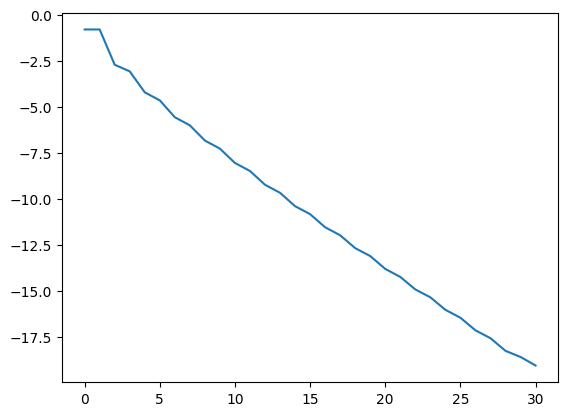

In [135]:
plt.plot(ns,np.log(errors))

## 8.2

In [150]:
## The trapez formula for integration
def MinTrapezKnownFunction(f,a,b,n):
    """Calculates the integral of f on [a,b] using the trapez formula
    args:
        f: function
        a: lower bound
        b: upper bound
        n: number of steps
    """
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    y = f(x)
    return h/2*(y[0]+y[-1]+2*np.sum(y[1:-1]))


In [156]:
def MinTrapez(y,a,b,n):
    """Calculates the integral of f on [a,b] using the trapez formula
    args:
        y: list of function values
        a: lower bound
        b: upper bound
        n: number of steps
    """
    h = (b-a)/n
    return h/2*(y[0]+y[-1]+2*np.sum(y[1:-1]))

In [152]:
## Simpson formula for integration
def MinSimpsonKnownFunction(f,a,b,n):
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    y = f(x)
    return h/3*(y[0]+y[-1]+4*np.sum(y[1:-1:2])+2*np.sum(y[2:-1:2]))

In [ ]:
def MinSimpson(y,x,a,b):
    """Calculates the integral of f on [a,b] using the trapez formula
    args:
        y: list of function values
        x: list of nodes
        a: lower bound
        b: upper bound
    """
    n = len(x)
    h = (b-a)/n
    return h/3*(y[0]+y[-1]+4*np.sum(y[1:-1:2])+2*np.sum(y[2:-1:2]))

In [153]:
f = lambda x: np.sin(x)

In [159]:
MinTrapezKnownFunction(f,0,np.pi,2)

1.5707963267948966

In [171]:
estimates = []
ns = []
for i in range(20,600,20):
    estimates.append(MinTrapezKnownFunction(f,0,np.pi,i))
    ns.append(i)

In [173]:
h = np.abs(np.array(estimates)-2)

In [174]:
k = np.array(estimates)/(np.array(ns)**2)

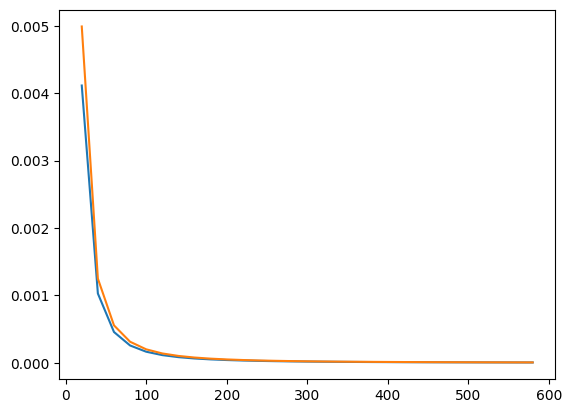

In [176]:
plt.plot(ns,h)
plt.plot(ns,k);

In [184]:
x = np.linspace(20,600,len(h))
y = np.log(h)

def Ftest(x):
    return [1,-np.log(np.abs(x))]
def Fctest(x,c):
    return c[0]+c[1]*(-np.log(np.abs(x)))

A = np.array(list(map(Ftest,x)))
c = np.linalg.solve(A.T@A, A.T@y)

In [185]:
c

array([0.48139748, 1.98595354])

In [192]:
ns*(h<10**(-5))

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 420, 440, 460, 480, 500, 520,
       540, 560, 580])

In [186]:
n0 = 509